# Setup

In [2]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import compute_in_degrees
import numpy as np
import seaborn as sns
from network_computation import compute_functional_network
from utils.utils import common_elements

Data

waist

0. OL_wx[active_slice]
1. OL_wy[active_slice]
2. OL_wz[active_slice]

hoop

3. OR_wx[active_slice]
4. OR_wy[active_slice]
5. OR_wz[active_slice]

tibia

6. IT_wx[active_slice]
7. IT_wy[active_slice]
8. IT_wz[active_slice]

cuneiform

9. IL_wx[active_slice]
10. IL_wy[active_slice]
11. IL_wz[active_slice]

femur

12. IB_wx[active_slice]
13. IB_wy[active_slice]
14. IB_wz[active_slice]

# Picking the recurrence rate

In [14]:
# truncate data

data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[0:500,:]

In [15]:
np.shape(data)

(500, 15)

In [63]:
# Define recurrence rate sets
rr_values = [
    # (0.01, 0.01, 0.005),
    # (0.03, 0.03, 0.01),
    # (0.03, 0.03, 0.02),
    # (0.04, 0.04, 0.02),
    (0.05, 0.05, 0.02),
    (0.06, 0.06, 0.02),
    (0.06, 0.06, 0.03),
    # (0.08, 0.08, 0.02)
    # (0.08, 0.08, 0.04),
    # (0.1, 0.1, 0.02)
    # (0.1, 0.1, 0.04),
    # (0.1, 0.1, 0.05),
]

# Compute networks
results = []
for rr in rr_values:
    G, G_, common_G, T_diff, C_diff = compute_functional_network(
        data, rr, C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1]
    )
    results.append({'rr': rr, 'T_diff': T_diff, 'C_diff': C_diff})


Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

In [64]:
# Initialize matrices for pairwise differences
n = len(rr_values)
delta_T = np.zeros((n, n))
delta_C = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        delta_T[i, j] = np.max(np.abs(results[j]['T_diff'] - results[i]['T_diff']))
        delta_C[i, j] = np.max(np.abs(results[j]['C_diff'] - results[i]['C_diff']))



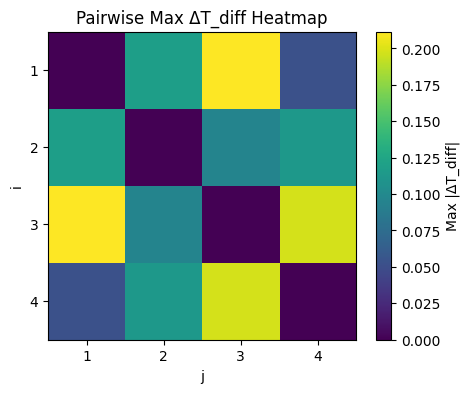

In [65]:
# Plot delta_T with custom axis labels
plt.figure(figsize=(5, 4))
im = plt.imshow(delta_T, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔT_diff Heatmap")
plt.show()

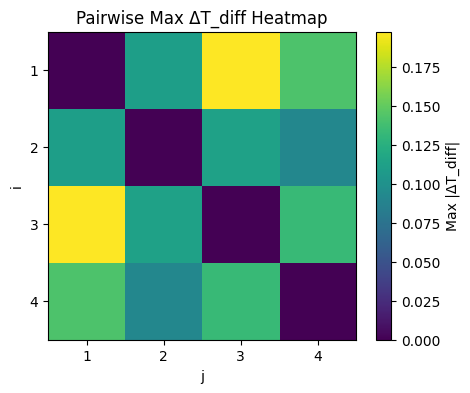

In [66]:
# Plot delta_T with custom axis labels
plt.figure(figsize=(5, 4))
im = plt.imshow(delta_C, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔT_diff Heatmap")
plt.show()

# Network Analysis
On complete data

Data

hoop

0. OR_wx[active_slice]
1. OR_wy[active_slice]
2. OR_wz[active_slice]

tibia

3. IT_wx[active_slice]
4. IT_wy[active_slice]
5. IT_wz[active_slice]

cuneiform

6. IL_wx[active_slice]
7. IL_wy[active_slice]
8. IL_wz[active_slice]

femur

9. IB_wx[active_slice]
10. IB_wy[active_slice]
11. IB_wz[active_slice]

In [120]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,3:]

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

In [105]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(T_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

In [107]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(C_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

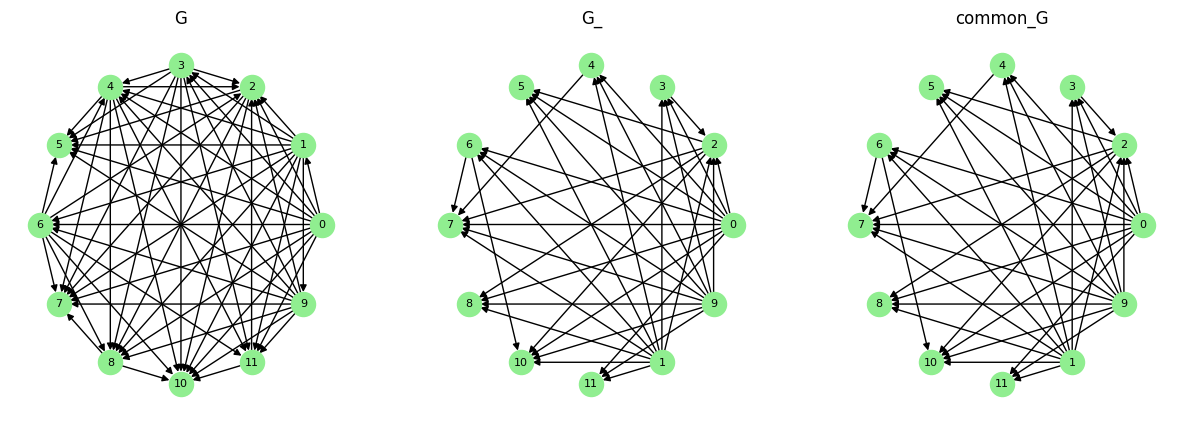

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

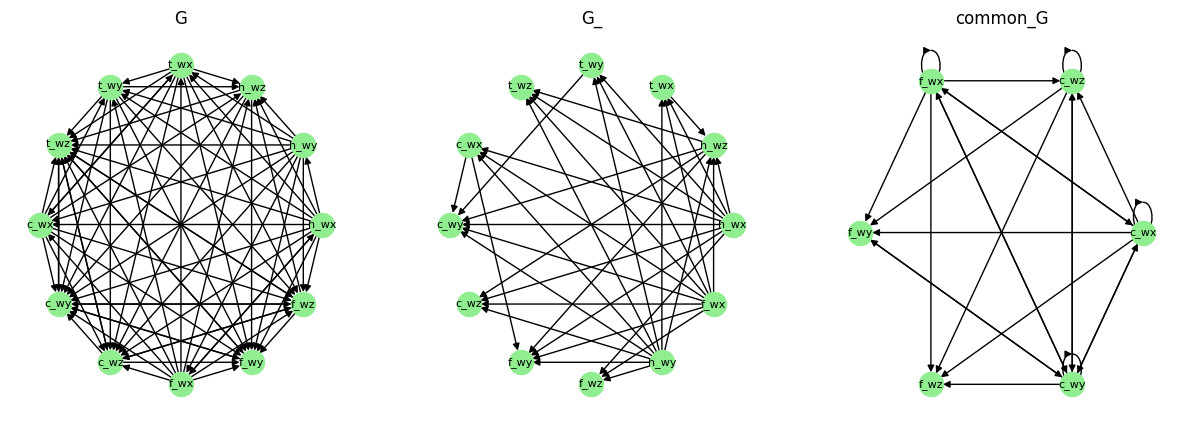

In [122]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup a Sample Graph (

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx",
    1: "h_wy",
    2: "h_wz",
    3: "t_wx",
    4: "t_wy",
    5: "t_wz",
    6: "c_wx",
    7: "c_wy",
    8: "c_wz",
    9: "f_wx",
    10: "f_wy",
    11: "f_wz"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [118]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,3:9] # hoop and tibia

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

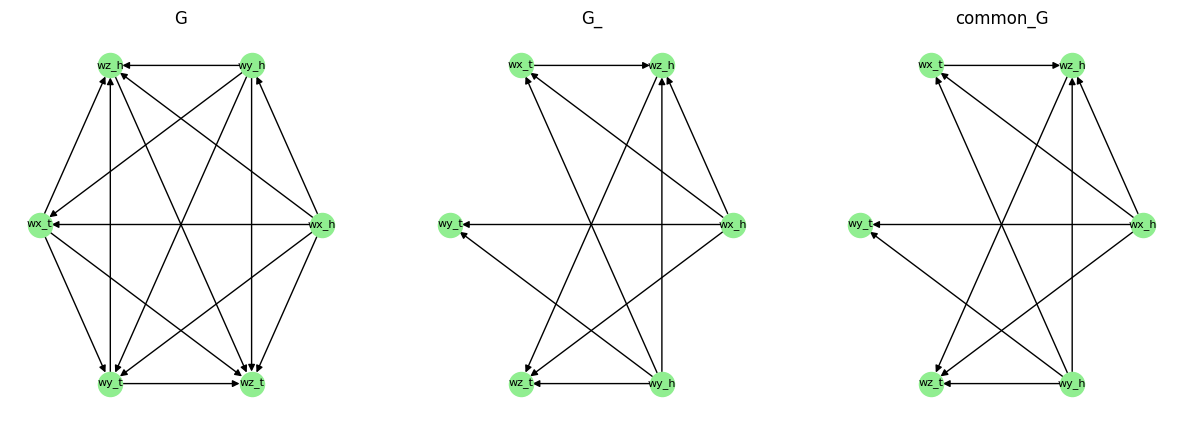

In [119]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_t",
    4: "wy_t",
    5: "wz_t"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [124]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,9,10,11]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

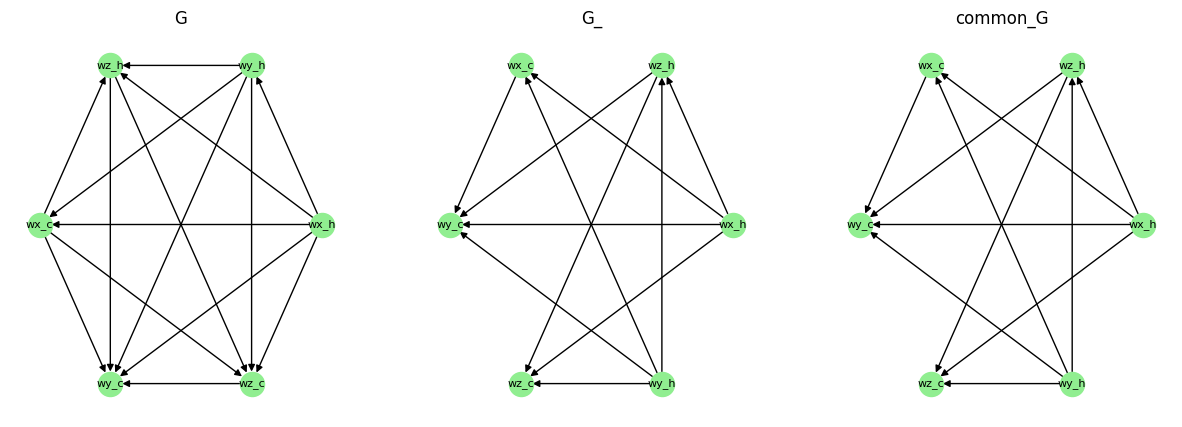

In [125]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_c",
    4: "wy_c",
    5: "wz_c"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [126]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,12,13,14]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

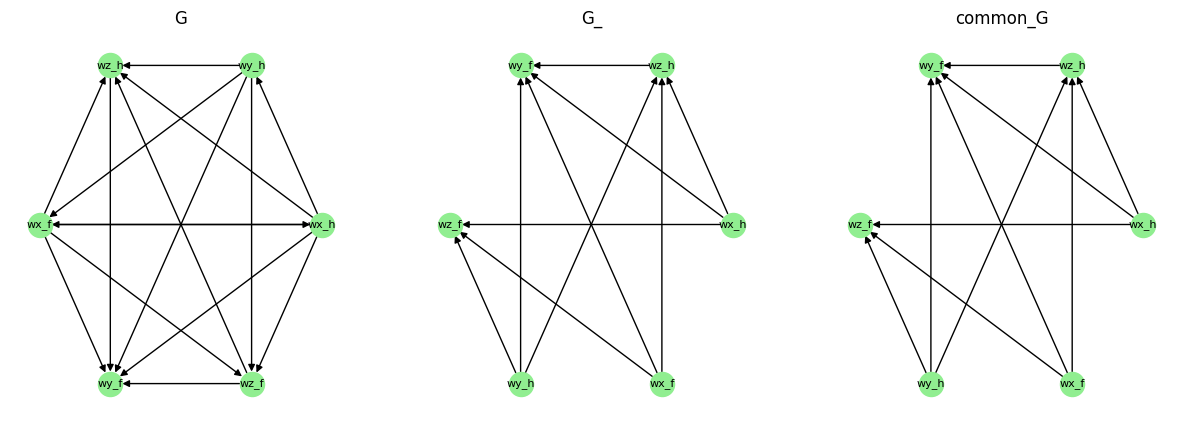

In [128]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_f",
    4: "wy_f",
    5: "wz_f"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

# Debugging


In [93]:
C_threshold = 0.02
T_threshold = 0.02

n = 12
verbose = False

# create an array of edges according to information in C_xy and C_yx
edges_XonY = []
A_XonY = np.zeros((n,n))
edges_YonX = []
A_YonX = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if C_diff[i, j] > C_threshold:
                edges_YonX.append([j, i])
                A_YonX[i,j] = 1
            elif C_diff[i, j] < -C_threshold:
                edges_XonY.append([i, j])
                A_XonY[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges.append([i, j])
            #     edges.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, C_diff = {C_diff[i, j]:.4f}, entry: {edges} ')

# generate graph
G_XonY = nx.DiGraph(edges_XonY)
G_YonX = nx.DiGraph(edges_YonX)

# create an array of edges according to information in T_xy and T_yx
edges_XonY_ = []
A_XonY_ = np.zeros((n,n))
edges_YonX_ = []
A_YonX_ = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if T_diff[i, j] > T_threshold:
                edges_YonX_.append([j, i])
                A_YonX_[i,j] = 1
            elif T_diff[i, j] < -T_threshold:
                edges_XonY_.append([i, j])
                A_XonY_[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges_.append([i, j])
            #     edges_.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, Tdiff = {T_diff[i, j]:.4f}, entry: {edges_} ')

# generate graph
G_XonY_ = nx.DiGraph(edges_XonY_)
G_YonX_ = nx.DiGraph(edges_YonX_)

# generate graph from common edges, i.e. edges that are indicated by both T and C
edges = edges_XonY+edges_YonX
edges_ = edges_XonY_+edges_YonX_

G = nx.DiGraph(edges)
G_ = nx.DiGraph(edges_)

common_edges = common_elements(edges, edges_)
common_G = nx.DiGraph(common_edges)

common_edges_XonY = common_elements(edges_XonY, edges_XonY_)
common_G_XonY = nx.DiGraph(common_edges_XonY)

common_edges_YonX = common_elements(edges_YonX, edges_YonX_)
common_G_YonX = nx.DiGraph(common_edges_YonX)

In [94]:
print(edges_XonY_)
print(edges_XonY)
print(edges_YonX_)
print(edges_YonX)

[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [4, 7], [6, 7], [6, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11]]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [3, 4], [3, 5], [3, 7], [3, 8], [3, 10], [3, 11], [4, 2], [4, 5], [4, 7], [4, 8], [4, 10], [4, 11], [6, 2], [6, 4], [6, 5], [6, 7], [6, 8], [6, 10], [6, 11], [8, 7], [8, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11], [11, 2], [11, 10]]
[[0, 2], [1, 2], [3, 2], [9, 2], [0, 3], [1, 3], [9, 3], [0, 4], [1, 4], [9, 4], [0, 5], [1, 5], [2, 5], [9, 5], [0, 6], [1, 6], [9, 6], [0, 7], [1, 7], [2, 7], [4, 7], [6, 7], [9, 7], [0, 8], [1, 8], [2, 8], [9, 8], [0, 10], [1, 10], [2

In [95]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes())[:10])  # first 10 nodes
print("Edges:", list(G.edges())[:10])  # first 10 edges

# Optional: some network metrics
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())


Number of nodes: 12
Number of edges: 57
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11)]
Average degree: 9.5


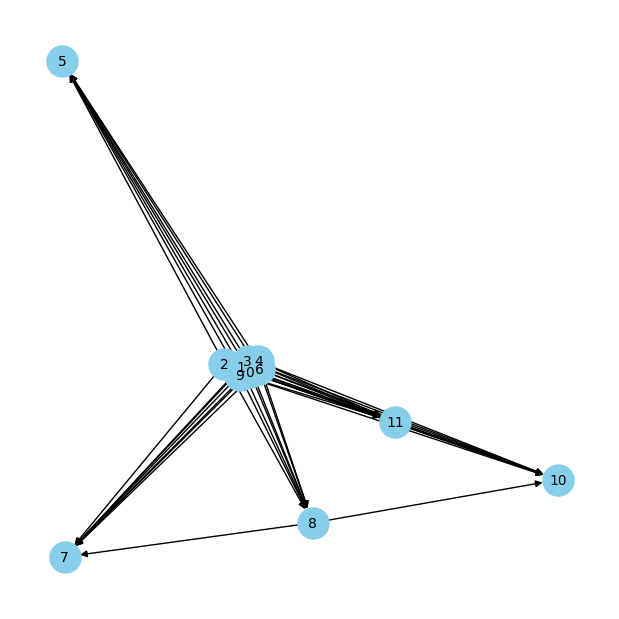

In [96]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

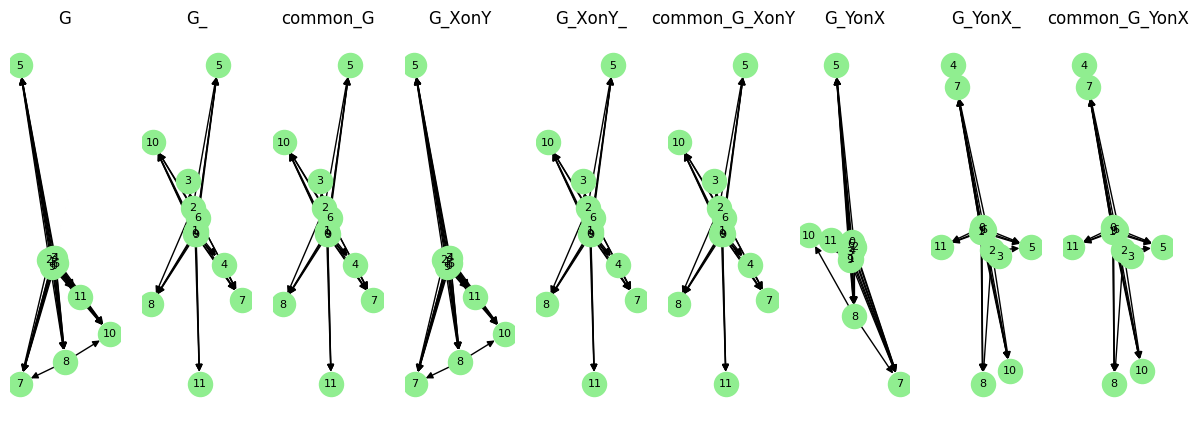

In [97]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G, G_XonY, G_XonY_, common_G_XonY, G_YonX, G_YonX_, common_G_YonX], ["G", "G_", "common_G", "G_XonY", "G_XonY_", "common_G_XonY", "G_YonX", "G_YonX_", "common_G_YonX"]):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()


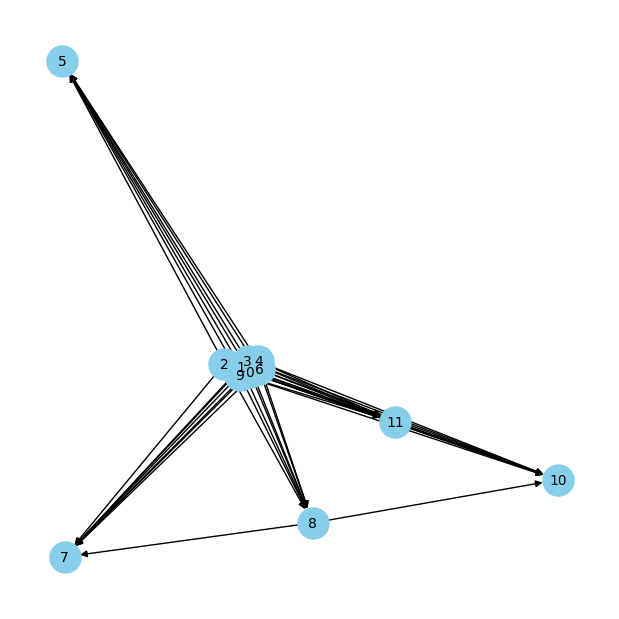

In [98]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

In [99]:
graph = G  
pos = nx.circular_layout(graph)

In [100]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

In [101]:
# pos = nx.spectral_layout(graph)

In [102]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

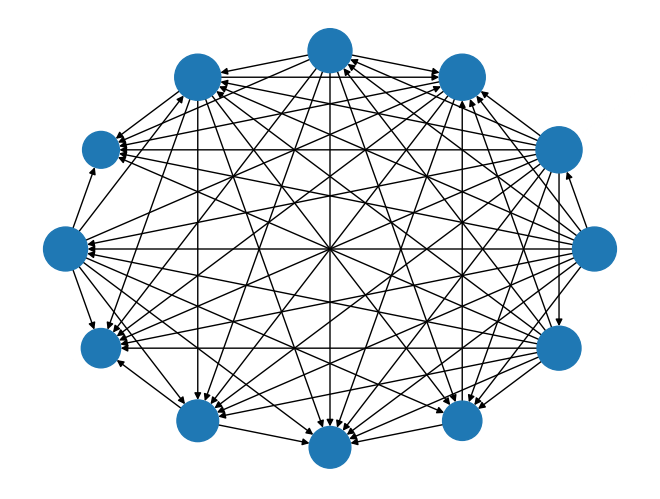

In [103]:
degrees = [graph.degree(n) * 100 for n in graph.nodes()] # Scale for size
nx.draw(graph, pos, node_size=degrees)

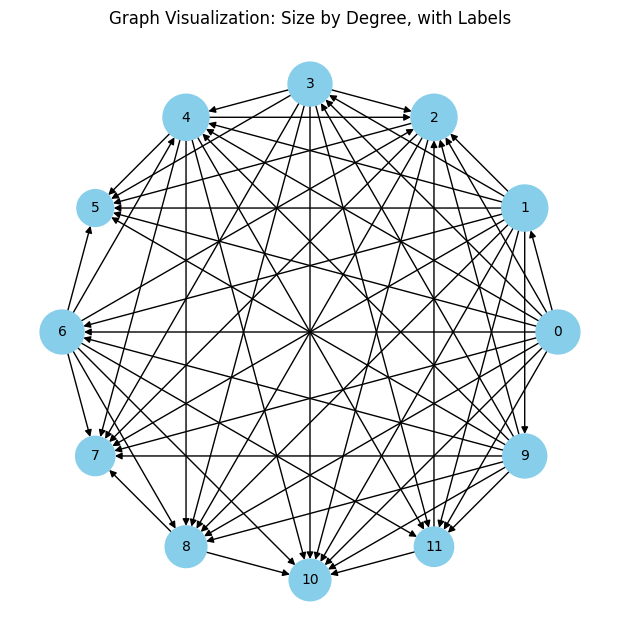

In [104]:


# Calculate node sizes based on degree, scaled by 100
degrees = [G.degree(n) * 100 for n in G.nodes()]

plt.figure(figsize=(6,6))

# Use nx.draw with the dynamic size and labels enabled
nx.draw(
    G, 
    pos,
    with_labels=True,        # <-- **This is the key to show node numbers**
    node_size=degrees,       # <-- Dynamic size based on degree
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.title("Graph Visualization: Size by Degree, with Labels")
plt.show()

In [ ]:
# Network method for each bone alone with hoop

